#  Laboratorio 7
# Predicción de Diabetes con AutoGluom
- Javier Prado 21496
- Luis Pedro Monterroso 21699

# Carga del conjunto de datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('diabetes.csv')
df = pd.DataFrame(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()
print(df.shape)
print(df.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
(768, 9)
int64      7
float64    2
Name: count, dtype: int64


In [5]:
# null values
print("Valores nulos:\n",df.isnull().sum())
# duplicated values
print("Duplicados:", df.duplicated().sum())

Valores nulos:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Duplicados: 0


In [6]:
# describe
print("Estadísticas descriptivas:\n", df.describe().T)

Estadísticas descriptivas:
                           count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.000

In [7]:
descripciones = {
 'Pregnancies':'Número de embarazos (conteo)',
 'GlucosePlasma':'Glucosa plasmática (mg/dL)',
 'BloodPressure':'Presión diastólica (mm Hg)',
 'Skin':'Pliegue cutáneo tríceps (mm)',
 'Insulin':'Insulina sérica a 2h (μU/mL)',
 'BMI':'Índice de masa corporal (kg/m²)',
 'DiabetesPedigreeFunction':'Índice de riesgo familiar (adimensional)',
 'Age':'Edad (años)',
 'Outcome':'Diabetes (0/1)'
}

suspect_zero = {'GlucosePlasma','BloodPressure','Skin','Insulin','BMI'}

rows=[]
for c in df.columns:
    s=df[c]
    zeros = (s==0).mean() if c in suspect_zero else np.nan
    rows.append({
        'Variable': c,
        'Descripción': descripciones.get(c, ''),
        'Tipo': str(s.dtype),
        'Nulos_%': s.isna().mean()*100,
        'Ceros_%(si_aplica)': zeros*100 if pd.notna(zeros) else '',
        'Min': s.min() if pd.api.types.is_numeric_dtype(s) else '',
        'Max': s.max() if pd.api.types.is_numeric_dtype(s) else '',
        'Media': s.mean() if pd.api.types.is_numeric_dtype(s) else '',
        'Mediana': s.median() if pd.api.types.is_numeric_dtype(s) else '',
        'DE': s.std() if pd.api.types.is_numeric_dtype(s) else ''
    })
dicc = pd.DataFrame(rows)
dicc


,Variable,Descripción,Tipo,Nulos_%,Ceros_%(si_aplica),Min,Max,Media,Mediana,DE
0,Pregnancies,Número de embarazos (conteo),int64,0.0,,0.000,17.00,3.845052,3.0000,3.369578
1,Glucose,,int64,0.0,,0.000,199.00,120.894531,117.0000,31.972618
2,BloodPressure,Presión diastólica (mm Hg),int64,0.0,4.557292,0.000,122.00,69.105469,72.0000,19.355807
3,SkinThickness,,int64,0.0,,0.000,99.00,20.536458,23.0000,15.952218
4,Insulin,Insulina sérica a 2h (μU/mL),int64,0.0,48.697917,0.000,846.00,79.799479,30.5000,115.244002
5,BMI,Índice de masa corporal (kg/m²),float64,0.0,1.432292,0.000,67.10,31.992578,32.0000,7.884160
6,DiabetesPedigreeFunction,Índice de riesgo familiar (adimensional),float64,0.0,,0.078,2.42,0.471876,0.3725,0.331329
7,Age,Edad (años),int64,0.0,,21.000,81.00,33.240885,29.0000,11.760232
8,Outcome,Diabetes (0/1),int64,0.0,,0.000,1.00,0.348958,0.0000,0.476951


Distribución de la variable Outcome:
 Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


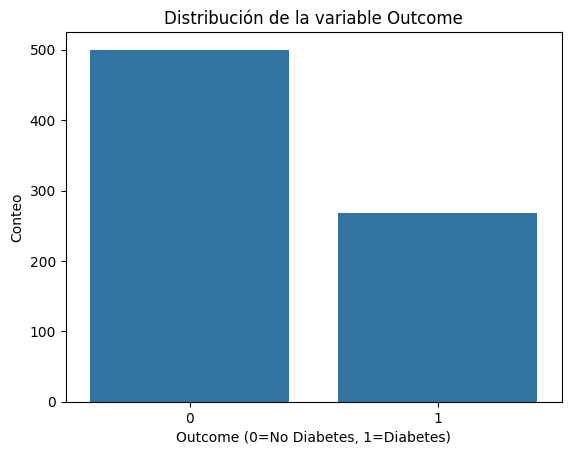

In [8]:
#Analisis variable Outcome
print("Distribución de la variable Outcome:\n", df['Outcome'].value_counts(normalize=True)*100)
# Visualización de la variable Outcome
sns.countplot(x='Outcome', data=df)
plt.title('Distribución de la variable Outcome')
plt.xlabel('Outcome (0=No Diabetes, 1=Diabetes)')
plt.ylabel('Conteo')
plt.show()

# Explicacion concepto Outcome
Outcome es la etiqueta binaria del conjunto de datos: indica si la persona presenta diabetes (1) o no presenta diabetes (0) de acuerdo con el criterio clínico usado para construir el dataset (p. ej., diagnóstico basado en pruebas de glucosa como la prueba de tolerancia oral; típicamente, valores elevados y/o criterios establecidos por guías clínicas). Esta columna es el objetivo (target) que intentaremos predecir a partir de los demás predictores (glucosa, presión diastólica, IMC, insulina, edad, etc.).
